# Dato Chatbot raw

In [ ]:
import pandas as pd
import numpy as py
import json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
explicit_final = pd.read_csv('/content/drive/MyDrive/DATO_CHATBOT_STRAT/explicit_true_labels (1).csv')

In [ ]:
explicit_final

,Unnamed: 0,Query,kb_number,KbFirstFeedback,CreationDate,date,UserId,Language,kb_label
0,0,no tengo datos en el móvil,KB0015675,True,2021-02-12 10:40:48.375082,2021-02-12,AA01552,es,Móvil / Mobile
1,1,¿como se agrega un buzon de outlook?,KB0011130,True,2021-03-08 19:14:46.039582,2021-03-08,AA01574,es,Correo Electrónico | Email
2,2,visio software in spanish,NaN,True,2021-03-17 20:09:26.231219,2021-03-17,ASENEFEL,en,NaN
3,3,\r\n\n\r\nHi. Can you reset my password in SAP...,KB0016331,True,2021-02-03 11:16:24.286639,2021-02-03,AUNDHEIM,en,NaN
4,4,\r\n\n\r\nHi. Can you reset my password in SAP...,KB0016331,True,2021-02-03 11:16:24.286639,2021-02-03,AUNDHEIM,en,SAP
...,...,...,...,...,...,...,...,...,...
535,535,una consulta tengo un equipo celular atex que ...,KB0014255,True,2021-01-16 16:46:08.542072,2021-01-16,NaN,es,WiFi
536,536,cuales son los pasos para enviar mis factura a...,KB0015711,True,2021-01-21 16:34:10.360176,2021-01-21,NaN,es,RIC | SIR (Departamental | Network Fold)
537,537,mi usuario SAP RK2 202 está bloqueado,KB0016116,True,2021-01-27 11:15:26.929943,2021-01-27,NaN,es,SAP
538,538,necesito desbloquear mi usuario sap,KB0016116,True,2021-01-27 11:16:22.846146,2021-01-27,NaN,es,SAP


In [ ]:
len_body = explicit_final['Query'].str.len()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


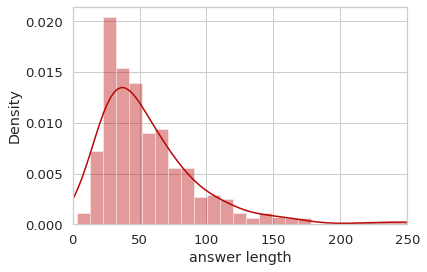

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.2)
#HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette('OrRd_r'))

sns.distplot(len_body)
plt.xlim([0, 250]);
plt.xlabel('answer length');

In [ ]:
cats =explicit_final['kb_label'].unique()

In [ ]:
len(cats)

40

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text major ticklabel objects>)

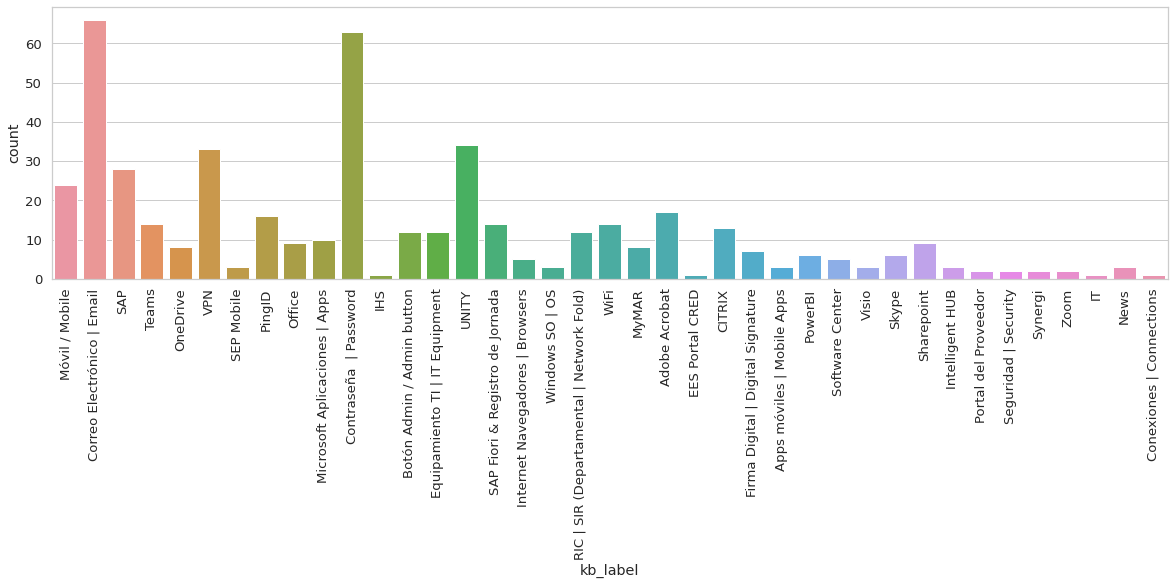

In [ ]:
plt.figure(figsize=(20,5)) 
g = sns.countplot(data=explicit_final,x='kb_label')
plt.xticks(rotation=90)


In [ ]:
explicit_final.shape

(540, 9)

# Eliminamos los datos nulos y limpiamos el dato textual de la Query

In [ ]:
explicit_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       540 non-null    int64 
 1   Query            540 non-null    object
 2   kb_number        524 non-null    object
 3   KbFirstFeedback  540 non-null    bool  
 4   CreationDate     540 non-null    object
 5   date             540 non-null    object
 6   UserId           530 non-null    object
 7   Language         540 non-null    object
 8   kb_label         475 non-null    object
dtypes: bool(1), int64(1), object(7)
memory usage: 34.4+ KB


In [ ]:
explicit_final.Language.unique()

array(['es', 'en'], dtype=object)

In [ ]:
import nltk 
from nltk.stem import PorterStemmer # para ver la raiz de las palabras(worker = work)
from nltk.tokenize import sent_tokenize, word_tokenize # para tokenizar las frases y las palabras 
import re # regex
import string

In [ ]:
def text_cleaning(text):
    
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text

In [ ]:
# aplicamos limpieza a query 

explicit_final['Query'] = explicit_final['Query'].astype('str')  # object a string
explicit_final['Query']= explicit_final['Query'].apply(text_cleaning) # aplicamos cleaning a review_body


In [ ]:
df = explicit_final[['Query','kb_label','Language']]

In [ ]:
df

,Query,kb_label,Language
0,no tengo datos en el móvil,Móvil / Mobile,es
1,como se agrega un buzon de outlook,Correo Electrónico | Email,es
2,visio software in spanish,NaN,en
3,hi can you reset my password in sap syst...,NaN,en
4,hi can you reset my password in sap syst...,SAP,en
...,...,...,...
535,una consulta tengo un equipo celular atex que ...,WiFi,es
536,cuales son los pasos para enviar mis factura a...,RIC | SIR (Departamental | Network Fold),es
537,mi usuario sap está bloqueado,SAP,es
538,necesito desbloquear mi usuario sap,SAP,es


In [ ]:
df = df.dropna()

In [ ]:
df

,Query,kb_label,Language
0,no tengo datos en el móvil,Móvil / Mobile,es
1,como se agrega un buzon de outlook,Correo Electrónico | Email,es
4,hi can you reset my password in sap syst...,SAP,en
5,install stream on teams,Teams,en
6,cuesta sanz david necesito usar el a...,OneDrive,es
...,...,...,...
535,una consulta tengo un equipo celular atex que ...,WiFi,es
536,cuales son los pasos para enviar mis factura a...,RIC | SIR (Departamental | Network Fold),es
537,mi usuario sap está bloqueado,SAP,es
538,necesito desbloquear mi usuario sap,SAP,es


In [ ]:
df.kb_label.value_counts()

Correo Electrónico | Email                  66
Contraseña  | Password                      63
UNITY                                       34
VPN                                         33
SAP                                         28
Móvil / Mobile                              24
Adobe Acrobat                               17
PingID                                      16
WiFi                                        14
SAP Fiori & Registro de Jornada             14
Teams                                       14
CITRIX                                      13
RIC | SIR (Departamental | Network Fold)    12
Botón Admin / Admin button                  12
Equipamiento TI | IT Equipment              12
Microsoft Aplicaciones | Apps               10
Sharepoint                                   9
Office                                       9
OneDrive                                     8
MyMAR                                        8
Firma Digital | Digital Signature            7
Skype        

# Dividimos en Español e Inglés

In [ ]:
import numpy as np
final_EN = df[df['Language'] == 'en']
final_ES = df[df['Language'] == 'es']
final_ES

,Query,kb_label,Language
0,no tengo datos en el móvil,Móvil / Mobile,es
1,como se agrega un buzon de outlook,Correo Electrónico | Email,es
6,cuesta sanz david necesito usar el a...,OneDrive,es
7,hola tengo problemas de conexión a vpn,VPN,es
8,se ha instalado una actualización en el smartp...,SEP Mobile,es
...,...,...,...
535,una consulta tengo un equipo celular atex que ...,WiFi,es
536,cuales son los pasos para enviar mis factura a...,RIC | SIR (Departamental | Network Fold),es
537,mi usuario sap está bloqueado,SAP,es
538,necesito desbloquear mi usuario sap,SAP,es


## Eliminamos las categorías que tengan menos de 3 ejemplos 
- Para poder hacer una division del dato estratificada 

In [ ]:
final_ES.kb_label.value_counts()

Contraseña  | Password                      60
Correo Electrónico | Email                  59
UNITY                                       31
VPN                                         27
Móvil / Mobile                              24
SAP                                         23
PingID                                      15
Adobe Acrobat                               14
SAP Fiori & Registro de Jornada             14
WiFi                                        13
Teams                                       12
Equipamiento TI | IT Equipment              12
Botón Admin / Admin button                  11
CITRIX                                      11
RIC | SIR (Departamental | Network Fold)    10
Microsoft Aplicaciones | Apps               10
Office                                       9
OneDrive                                     8
Firma Digital | Digital Signature            7
MyMAR                                        7
Sharepoint                                   6
PowerBI      

In [ ]:
#Eliminamos categorias con menos de tres ejemplos 
final_ES = final_ES[final_ES['kb_label'] != 'Intelligent HUB' ]
final_ES = final_ES[final_ES['kb_label'] != 'Seguridad | Security']       
final_ES = final_ES[final_ES['kb_label'] != 'Portal del Proveedor']
final_ES = final_ES[final_ES['kb_label'] != 'IT' ]
final_ES = final_ES[final_ES['kb_label'] != 'Synergi' ]
final_ES = final_ES[final_ES['kb_label'] != 'IHS']
final_ES = final_ES[final_ES['kb_label'] != 'Zoom' ]
final_ES = final_ES[final_ES['kb_label'] != 'EES Portal CRED' ]
final_ES = final_ES[final_ES['kb_label'] != 'Conexiones | Connections']

In [ ]:
final_ES.kb_label.value_counts()

Contraseña  | Password                      60
Correo Electrónico | Email                  59
UNITY                                       31
VPN                                         27
Móvil / Mobile                              24
SAP                                         23
PingID                                      15
Adobe Acrobat                               14
SAP Fiori & Registro de Jornada             14
WiFi                                        13
Teams                                       12
Equipamiento TI | IT Equipment              12
Botón Admin / Admin button                  11
CITRIX                                      11
RIC | SIR (Departamental | Network Fold)    10
Microsoft Aplicaciones | Apps               10
Office                                       9
OneDrive                                     8
MyMAR                                        7
Firma Digital | Digital Signature            7
PowerBI                                      6
Sharepoint   

In [ ]:
final_EN.kb_label.value_counts()

Correo Electrónico | Email                  7
VPN                                         6
SAP                                         5
UNITY                                       3
Adobe Acrobat                               3
Sharepoint                                  3
Contraseña  | Password                      3
CITRIX                                      2
RIC | SIR (Departamental | Network Fold)    2
Teams                                       2
Software Center                             1
MyMAR                                       1
WiFi                                        1
Intelligent HUB                             1
Zoom                                        1
Botón Admin / Admin button                  1
Synergi                                     1
PingID                                      1
Skype                                       1
Name: kb_label, dtype: int64

In [ ]:
#Eliminamos categorias con menos de tres ejemplos 
final_EN = final_EN[final_EN['kb_label'] != 'Intelligent HUB' ]
final_EN = final_EN[final_EN['kb_label'] != 'CITRIX']   
final_EN = final_EN[final_EN['kb_label'] != 'RIC | SIR (Departamental | Network Fold)']
final_EN = final_EN[final_EN['kb_label'] != 'Zoom' ]
final_EN = final_EN[final_EN['kb_label'] != 'Synergi' ]
final_EN = final_EN[final_EN['kb_label'] != 'Teams' ]
final_EN = final_EN[final_EN['kb_label'] != 'Botón Admin / Admin button' ]
final_EN = final_EN[final_EN['kb_label'] != 'MyMAR' ]
final_EN = final_EN[final_EN['kb_label'] != 'PingID' ]
final_EN = final_EN[final_EN['kb_label'] != 'Skype' ]
final_EN = final_EN[final_EN['kb_label'] != 'Software Center' ]
final_EN = final_EN[final_EN['kb_label'] != 'WiFi' ]

In [ ]:
final_EN.kb_label.value_counts()

Correo Electrónico | Email    7
VPN                           6
SAP                           5
Adobe Acrobat                 3
Contraseña  | Password        3
UNITY                         3
Sharepoint                    3
Name: kb_label, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

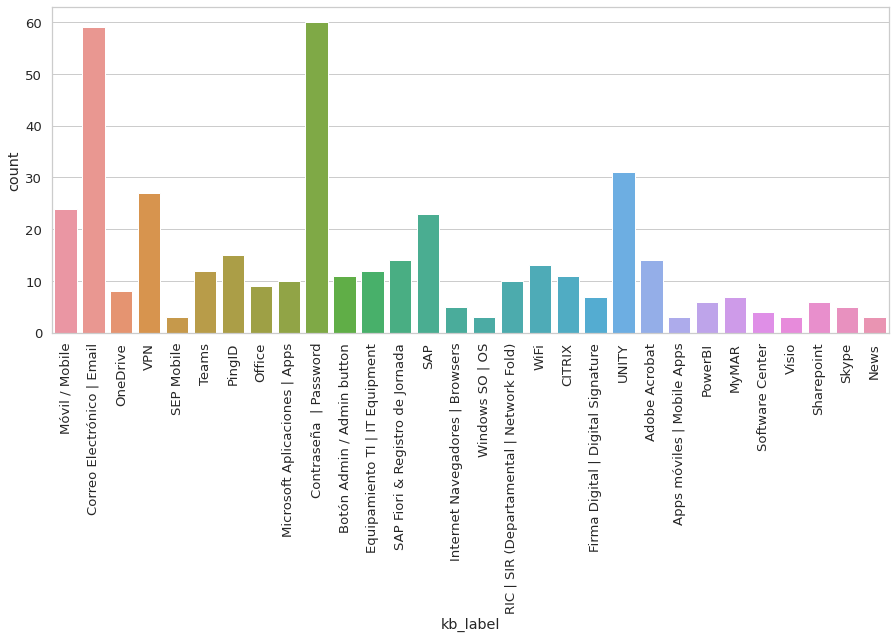

In [ ]:


plt.figure(figsize=(15,6)) 
sns.set(style='whitegrid', font_scale=1.2)
sns.set_palette(sns.color_palette('Purples'))
g = sns.countplot(data=final_ES,x='kb_label')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

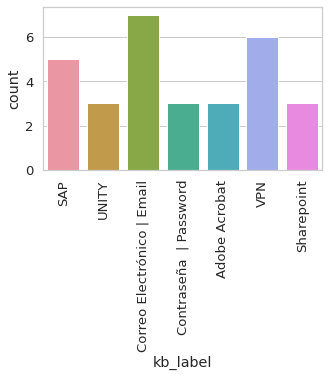

In [ ]:
plt.figure(figsize=(5,3)) 
g = sns.countplot(data=final_EN,x='kb_label')
plt.xticks(rotation=90)

# Codificamos de forma única las categorias

In [ ]:
import itertools
class LabelEncoder(object):
    """Label encoder for tag labels."""
    def __init__(self, class_to_index={}):
        self.class_to_index = class_to_index
        self.index_to_class = {v: k for k, v in self.class_to_index.items()}
        self.classes = list(self.class_to_index.keys())

    def __len__(self):
        return len(self.class_to_index)

    def __str__(self):
        return f"<LabelEncoder(num_classes={len(self)})>"

    def fit(self, y):
        classes = np.unique(final_ES['kb_label'])
        for i, class_ in enumerate(classes):
            self.class_to_index[class_] = i
        self.index_to_class = {v: k for k, v in self.class_to_index.items()}
        self.classes = list(self.class_to_index.keys())
        return self

    def encode(self, y):
        encoded = np.zeros((len(y)), dtype=int)
        for i, item in enumerate(y):
            encoded[i] = self.class_to_index[item]
        return encoded

    def decode(self, y):
        classes = []
        for i, item in enumerate(y):
            classes.append(self.index_to_class[item])
        return classes

    def save(self, fp):
        with open(fp, 'w') as fp:
            contents = {'class_to_index': self.class_to_index}
            json.dump(contents, fp, indent=4, sort_keys=False)

    @classmethod
    def load(cls, fp):
        with open(fp, 'r') as fp:
            kwargs = json.load(fp=fp)
        return cls(**kwargs)

In [ ]:
# Encode
label_encoder = LabelEncoder()
label_encoder.fit(final_ES['kb_label'])
NUM_CLASSES = len(label_encoder)
label_encoder.class_to_index

{'Adobe Acrobat': 0,
 'Apps móviles | Mobile Apps': 1,
 'Botón Admin / Admin button': 2,
 'CITRIX': 3,
 'Contraseña  | Password': 4,
 'Correo Electrónico | Email': 5,
 'Equipamiento TI | IT Equipment': 6,
 'Firma Digital | Digital Signature': 7,
 'Internet Navegadores | Browsers': 8,
 'Microsoft Aplicaciones | Apps': 9,
 'MyMAR': 10,
 'Móvil / Mobile': 11,
 'News': 12,
 'Office': 13,
 'OneDrive': 14,
 'PingID': 15,
 'PowerBI': 16,
 'RIC | SIR (Departamental | Network Fold)': 17,
 'SAP': 18,
 'SAP Fiori & Registro de Jornada': 19,
 'SEP Mobile': 20,
 'Sharepoint': 21,
 'Skype': 22,
 'Software Center': 23,
 'Teams': 24,
 'UNITY': 25,
 'VPN': 26,
 'Visio': 27,
 'WiFi': 28,
 'Windows SO | OS': 29}

In [ ]:
final_ES['category_cod']= label_encoder.encode(final_ES['kb_label'])
final_ES.head()

,Query,kb_label,Language,category_cod
0,no tengo datos en el móvil,Móvil / Mobile,es,11
1,como se agrega un buzon de outlook,Correo Electrónico | Email,es,5
6,cuesta sanz david necesito usar el a...,OneDrive,es,14
7,hola tengo problemas de conexión a vpn,VPN,es,26
8,se ha instalado una actualización en el smartp...,SEP Mobile,es,20


In [ ]:
final_EN['category_cod']= label_encoder.encode(final_EN['kb_label'])
final_EN.head()

,Query,kb_label,Language,category_cod
4,hi can you reset my password in sap syst...,SAP,en,18
24,can you help to expedite it we are trying to...,UNITY,en,25
25,how do i setup a new android phone,Correo Electrónico | Email,en,5
40,i need a password sent to dustin mcmann so i c...,Contraseña | Password,en,4
41,how to create a new user in repsol,UNITY,en,25


# Dividimos Train, Valid, Test 

- Haciendo estratificación para que haya los mismos porcentajes de todas las clases en los 3 grupos

In [ ]:
# Train valid test stratified !!!!
final_ES.kb_label.value_counts()

Contraseña  | Password                      60
Correo Electrónico | Email                  59
UNITY                                       31
VPN                                         27
Móvil / Mobile                              24
SAP                                         23
PingID                                      15
Adobe Acrobat                               14
SAP Fiori & Registro de Jornada             14
WiFi                                        13
Teams                                       12
Equipamiento TI | IT Equipment              12
CITRIX                                      11
Botón Admin / Admin button                  11
RIC | SIR (Departamental | Network Fold)    10
Microsoft Aplicaciones | Apps               10
Office                                       9
OneDrive                                     8
Firma Digital | Digital Signature            7
MyMAR                                        7
Sharepoint                                   6
PowerBI      

In [ ]:
final_ES = final_ES.reset_index(drop = True)

In [ ]:
final_ES.groupby(['kb_label','category_cod','Query']).sum()

Language
kb_label        category_cod Query                                                      
Adobe Acrobat   0                     como iniciar sesion en adobe acrobat p...       es
                               necesitaría que se incluya en el centro de so...       es
                              cuáles son las credenciales para entrar en ado...       es
                              tienes ya acceso   adobe acrobat pro                    es
                             he realizado una petición para instalación de a...       es
...                                                                                  ...
WiFi            28           una consulta tengo un equipo celular atex que n...       es
                             wifi movil                                               es
Windows SO | OS 29                buenos días  me han dicho que para poder u...       es
                             migracion windows                                        es
                             quiero cambiar el windows  por el windows                es

[416 rows x 1 columns]

In [ ]:
final_EN.groupby(['kb_label','category_cod','Query']).sum()

Language
kb_label                   category_cod Query                                                      
Adobe Acrobat              0                 hi  i have received a file with  rar exten...       en
                                             how do i get access to adobe acrobat pro d...       en
                                        how do i request a new application                       en
Contraseña  | Password     4            how to change password using pingid                      en
                                        i need a password sent to dustin mcmann so i ca...       en
                                        my account is closed                                     en
Correo Electrónico | Email 5                     i want to add members to a distributio...       en
                                        how do i setup a new android phone                       en
                                        how to change password using repsol mobile app           en
                                        i have received an email i think is a spam emai...       en
                                        i want to add members to a distribution list             en
                                        internet does not work  outlook does not work  ...       en
                                        need your help to provide bramntsv email access...       en
SAP                        18                hi  can you reset my password in sap syste...       en
                                             hi  i need to get access to t code zfvendo...       en
                                          se solicita asignar en sap   al usuario chiar...       en
                                        hi  last month i lodge a report regarding repor...       en
                                        ok     assigning roles in sap systems   erp              en
Sharepoint                 21           how do i edit a page in sharepoint                     enen
                                        how do i request a sharepoint with access form ...       en
UNITY                      25           can you help to expedite it   we are trying to ...       en
                                        how to create a new user in repsol                       en
                                        i am trying to create an incident in unity but ...       en
VPN                        26           can t connect to vpn                                     en
                                        dear mymar  my vpn account is locked  appreciat...       en
                                        i am working remotely from home  how often and ...       en
                                        i can t connect to vpn                                   en
                                        my pc isunable to connect to vpn                         en
                                        my vpn is not connecting                                 en

In [ ]:
from sklearn.model_selection import train_test_split

def split_stratified_into_train_val_test(df_input, stratify_colname='y',
                                         frac_train=0.6, frac_val=0.15, frac_test=0.25,
                                         random_state=None):
    '''
    Splits a Pandas dataframe into three subsets (train, val, and test)
    following fractional ratios provided by the user, where each subset is
    stratified by the values in a specific column (that is, each subset has
    the same relative frequency of the values in the column). It performs this
    splitting by running train_test_split() twice.

    Parameters
    ----------
    df_input : Pandas dataframe
        Input dataframe to be split.
    stratify_colname : str
        The name of the column that will be used for stratification. Usually
        this column would be for the label.
    frac_train : float
    frac_val   : float
    frac_test  : float
        The ratios with which the dataframe will be split into train, val, and
        test data. The values should be expressed as float fractions and should
        sum to 1.0.
    random_state : int, None, or RandomStateInstance
        Value to be passed to train_test_split().

    Returns
    -------
    df_train, df_val, df_test :
        Dataframes containing the three splits.
    '''

    if frac_train + frac_val + frac_test != 1.0:
        raise ValueError('fractions %f, %f, %f do not add up to 1.0' % \
                         (frac_train, frac_val, frac_test))

    if stratify_colname not in df_input.columns:
        raise ValueError('%s is not a column in the dataframe' % (stratify_colname))

    X = df_input # Contains all columns.
    y = df_input[[stratify_colname]] # Dataframe of just the column on which to stratify.

    # Split original dataframe into train and temp dataframes.
    df_train, df_temp, y_train, y_temp = train_test_split(X,
                                                          y,
                                                          stratify=y,
                                                          test_size=(1.0 - frac_train),
                                                          random_state=random_state)

    # Split the temp dataframe into val and test dataframes.
    relative_frac_test = frac_test / (frac_val + frac_test)
    df_val, df_test, y_val, y_test = train_test_split(df_temp,
                                                      y_temp,
                                                      stratify=y_temp,
                                                      test_size=relative_frac_test,
                                                      random_state=random_state)

    assert len(df_input) == len(df_train) + len(df_val) + len(df_test)

    return df_train, df_val, df_test

In [ ]:
df_train, df_val, df_test = split_stratified_into_train_val_test(final_ES, stratify_colname='kb_label', frac_train=0.3, frac_val=0.2, frac_test=0.5)

In [ ]:
df_train.shape

(125, 4)

In [ ]:
len(df_train.kb_label.unique())

30

In [ ]:
df_val.shape

(83, 4)

In [ ]:
len(df_val.kb_label.unique())

30

In [ ]:
df_test.shape

(210, 4)

In [ ]:
len(df_test.kb_label.unique())

30

# Guardamos en csv


In [ ]:
df_train_final = df_test
df_test_final = df_val
df_val_final =  df_train

In [ ]:
df_train_final.shape

(210, 4)

In [ ]:
df_val_final.shape

(125, 4)

In [ ]:
df_test_final.shape

(83, 4)

In [ ]:
df_train = df_train_final.reset_index(drop=True)
df_valid =  df_val_final.reset_index(drop=True)
df_test = df_test_final.reset_index(drop=True)

In [ ]:
df_train.to_csv('DATO_CHATBOT_STRAT/chatbot_trainES.csv',index = False)

In [ ]:
df_valid.to_csv('DATO_CHATBOT_STRAT/chatbot_validES.csv',index = False)
df_test.to_csv('DATO_CHATBOT_STRAT/chatbot_testES.csv',index = False)

In [ ]:
final_EN.to_csv('DATO_CHATBOT_STRAT/chatbot_testEN.csv',index = False)

In [ ]:
#Probamos a cargarlo

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/DATO_CHATBOT_STRAT/chatbot_trainES.csv')
df_valid = pd.read_csv('/content/drive/MyDrive/DATO_CHATBOT_STRAT/chatbot_validES.csv')
df_test = pd.read_csv('/content/drive/MyDrive/DATO_CHATBOT_STRAT/chatbot_testES.csv')


In [ ]:
df_train

,Query,kb_label,Language,category_cod
0,quiero un acceso a la carpeta compartidos,OneDrive,es,14
1,como acceder al centro de software,Software Center,es,23
2,qué hacer si el correo electrónico de mi...,Correo Electrónico | Email,es,5
3,necesito saber como pedir ampliacion d...,Móvil / Mobile,es,11
4,el registro de jornada no funciona ni en expl...,SAP Fiori & Registro de Jornada,es,19
...,...,...,...,...
205,mi usuario sap está bloqueado,SAP,es,18
206,incremento datos necesito aumentar datos móvi...,Móvil / Mobile,es,11
207,es un operador de nueva incorporación y no tie...,News,es,12
208,tengo problemas para ingresar al sap,SAP,es,18
